# Hunting for Exoplanets with Machine Learning
## Initial Data Processing

See my presentation with results [here](https://aleksod.github.io/Exoplanet-Hunter/).

### NOTE: The code below omits fitting to various classifiers and only uses the one that gave me the best end results. If you are interested in more details with results, you can access my fully ran Jupyter Notebook [here](https://github.com/aleksod/Main_Repo/blob/master/Projects/Exoplanet-Hunting/main.ipynb), instead.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from  scipy import ndimage
import matplotlib
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [19]:
extrain = pd.read_csv('ExoTrain.csv')


In [20]:
extrain.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
1,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
2,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
3,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
4,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16


IndexError: single positional indexer is out-of-bounds

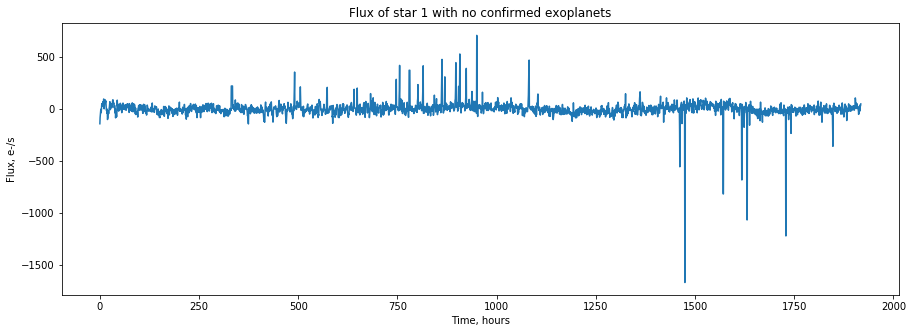

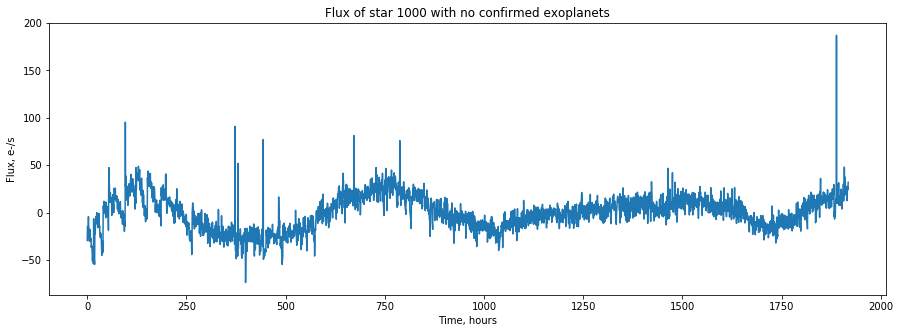

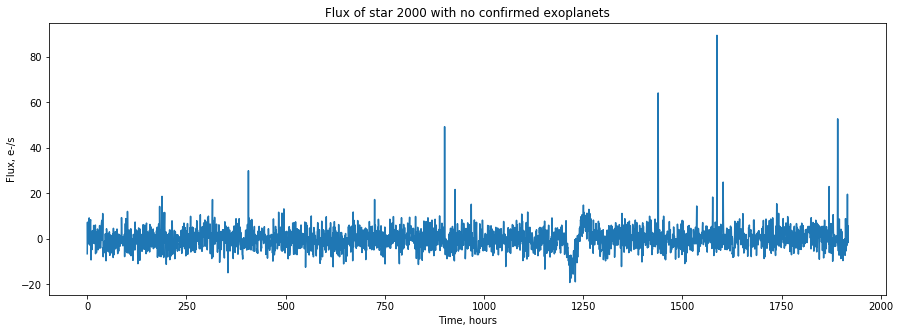

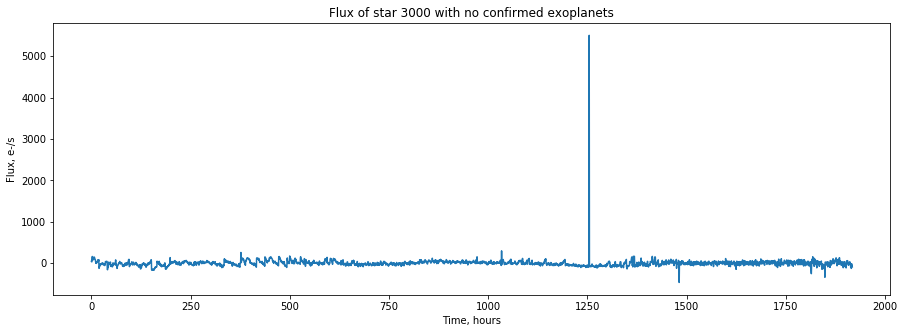

In [21]:
# Obtaining flux for several stars without exoplanets from the train data:
for i in [0, 999, 1999, 2999, 3999, 4999]:
    flux = extrain[extrain.LABEL == 1].drop('LABEL', axis=1).iloc[i,:]
    time = np.arange(len(flux)) * (36.0/60.0) # time in units of hours
    plt.figure(figsize=(15,5))
    plt.title('Flux of star {} with no confirmed exoplanets'.format(i+1))
    plt.ylabel('Flux, e-/s')
    plt.xlabel('Time, hours')
    plt.plot(time, flux)

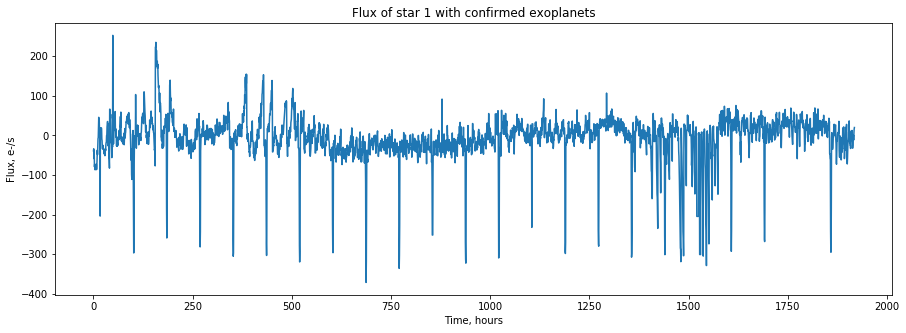

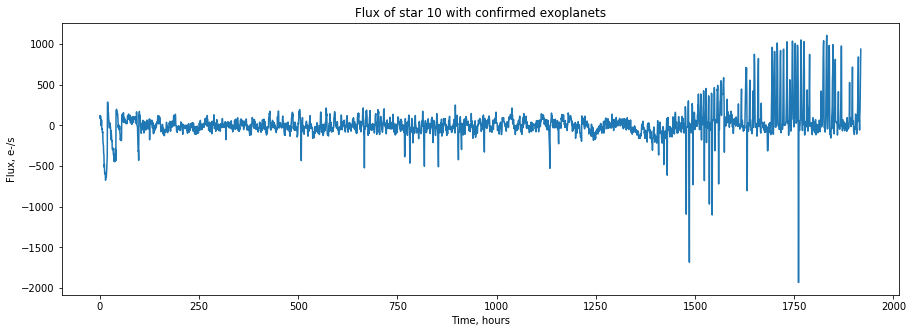

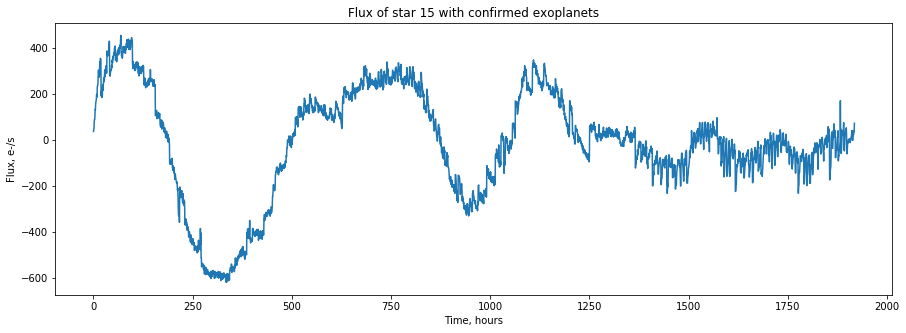

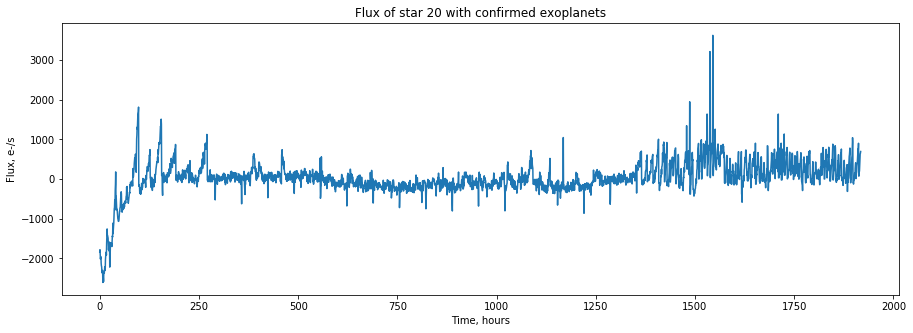

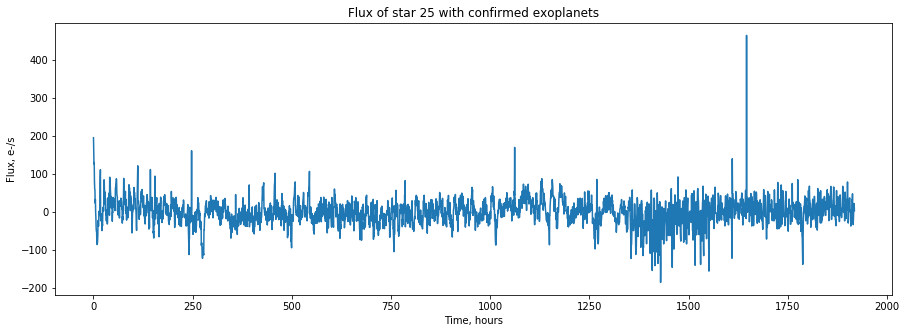

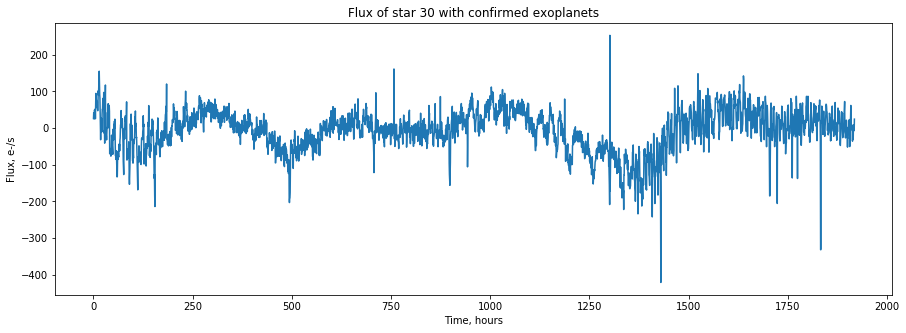

In [22]:
# Obtaining flux for several stars without exoplanets from the train data:
for i in [0, 9, 14, 19, 24, 29]:
    flux = extrain[extrain.LABEL == 2].drop('LABEL', axis=1).iloc[i,:]
    time = np.arange(len(flux)) * (36.0/60.0) # time in units of hours
    plt.figure(figsize=(15,5))
    plt.title('Flux of star {} with confirmed exoplanets'.format(i+1))
    plt.ylabel('Flux, e-/s')
    plt.xlabel('Time, hours')
    plt.plot(time, flux)

There are a lot of different shapes and magnitudes in the data. Therefore, the data needs to be transformed to one single standard in order for us to produce a better model:  

### 1. Detrend data  
We have noticed many different shapes in the signal. Removing any trends can go a long way in further processing:

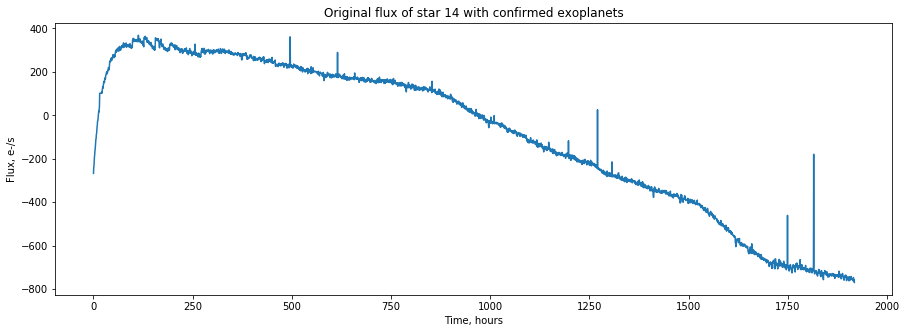

In [23]:
i = 13
flux1 = extrain[extrain.LABEL == 2].drop('LABEL', axis=1).iloc[i,:]
time = np.arange(len(flux1)) * (36.0/60.0) # time in units of hours
plt.figure(figsize=(15,5))
plt.title('Original flux of star {} with confirmed exoplanets'.format(i+1))
plt.ylabel('Flux, e-/s')
plt.xlabel('Time, hours')
plt.plot(time, flux1)

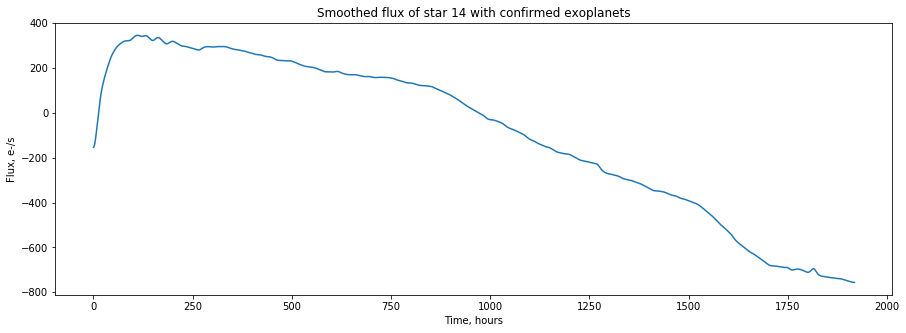

In [24]:
i = 13
flux2 = ndimage.filters.gaussian_filter(flux1, sigma=10)
time = np.arange(len(flux2)) * (36.0/60.0) # time in units of hours
plt.figure(figsize=(15,5))
plt.title('Smoothed flux of star {} with confirmed exoplanets'.format(i+1))
plt.ylabel('Flux, e-/s')
plt.xlabel('Time, hours')
plt.plot(time, flux2)

Detrend the signal:

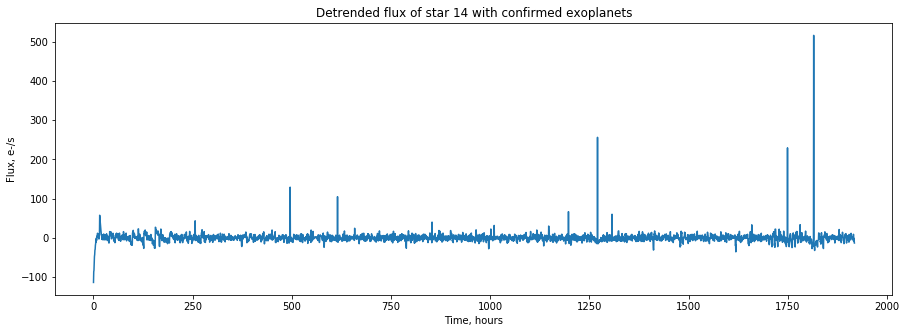

In [25]:
i = 13
flux3 = flux1 - flux2
time = np.arange(len(flux3)) * (36.0/60.0) # time in units of hours
plt.figure(figsize=(15,5))
plt.title('Detrended flux of star {} with confirmed exoplanets'.format(i+1))
plt.ylabel('Flux, e-/s')
plt.xlabel('Time, hours')
plt.plot(time, flux3)

### 2. Normalize the detrended signal

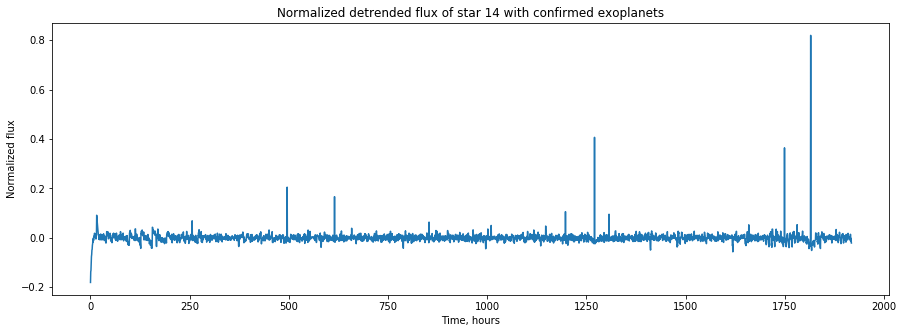

In [26]:
i = 13
flux3normalized = (flux3-np.mean(flux3))/(np.max(flux3)-np.min(flux3))
time = np.arange(len(flux3normalized)) * (36.0/60.0) # time in units of hours
plt.figure(figsize=(15,5))
plt.title('Normalized detrended flux of star {} with confirmed exoplanets'.format(i+1))
plt.ylabel('Normalized flux')
plt.xlabel('Time, hours')
plt.plot(time, flux3normalized)

In [27]:
def detrender_normalizer(X):
    flux1 = X
    flux2 = ndimage.filters.gaussian_filter(flux1, sigma=10)
    flux3 = flux1 - flux2
    flux3normalized = (flux3-np.mean(flux3)) / (np.max(flux3)-np.min(flux3))
    return flux3normalized

In [28]:
extrain.iloc[:,1:] = extrain.iloc[:,1:].apply(detrender_normalizer,axis=1)
extest.iloc[:,1:] = extest.iloc[:,1:].apply(detrender_normalizer,axis=1)

NameError: name 'extest' is not defined

In [29]:
extrain.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.041485,0.050703,0.003597,0.037446,-0.037595,-0.026886,-0.054623,-0.054545,-0.054560,...,0.007640,-0.047580,-0.048278,-0.035134,0.002010,0.012103,-0.011757,0.022125,0.039876,0.047170
1,2,0.036390,0.039271,0.018812,0.003153,-0.034190,-0.026011,-0.027999,-0.008730,-0.054926,...,-0.035135,0.042446,0.042538,0.003252,0.011593,0.035374,0.020106,0.004589,-0.032843,-0.057117
2,2,0.019349,0.081422,-0.052651,-0.065242,-0.006866,-0.021728,0.007249,-0.024948,-0.020675,...,0.038329,0.008620,0.007142,0.106338,0.075364,-0.022922,-0.012111,-0.038125,-0.038649,0.054377
3,2,-0.058758,-0.061891,-0.066326,-0.059138,-0.047121,-0.041884,-0.031973,-0.047753,-0.040327,...,-0.038013,0.038773,0.036134,0.052166,0.014349,0.014799,0.029481,0.034669,0.022747,-0.018448
4,2,0.044592,-0.005474,0.011612,0.021639,0.023444,0.003302,0.042383,0.018003,0.007260,...,-0.082921,0.052706,0.052003,0.050641,0.049271,0.038767,-0.028471,-0.026300,-0.038394,0.000451


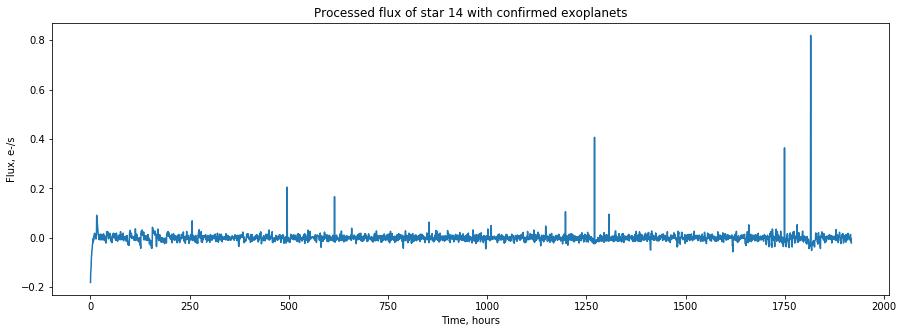

In [31]:
i = 13
flux1 = extrain[extrain.LABEL == 2].drop('LABEL', axis=1).iloc[i,:]
flux1 = flux1.reset_index(drop=True)
time = np.arange(len(flux1)) * (36.0/60.0) # time in units of hours
plt.figure(figsize=(15,5))
plt.title('Processed flux of star {} with confirmed exoplanets'.format(i+1))
plt.ylabel('Flux, e-/s')
plt.xlabel('Time, hours')
plt.plot(time, flux1)

In [30]:
def reduce_upper_outliers(df,reduce = 0.01, half_width=4):
    '''
    Since we are looking at dips in the data, we should remove upper outliers.
    The function is taken from here:
    https://www.kaggle.com/muonneutrino/exoplanet-data-visualization-and-exploration
    '''
    length = len(df.iloc[0,:])
    remove = int(length*reduce)
    for i in df.index.values:
        values = df.loc[i,:]
        sorted_values = values.sort_values(ascending = False)
       # print(sorted_values[:30])
        for j in range(remove):
            idx = sorted_values.index[j]
            #print(idx)
            new_val = 0
            count = 0
            idx_num = int(idx[5:])
            #print(idx,idx_num)
            for k in range(2*half_width+1):
                idx2 = idx_num + k - half_width
                if idx2 <1 or idx2 >= length or idx_num == idx2:
                    continue
                new_val += values['FLUX.'+str(idx2)] # corrected from 'FLUX-' to 'FLUX.'
                
                count += 1
            new_val /= count # count will always be positive here
            #print(new_val)
            if new_val < values[idx]: # just in case there's a few persistently high adjacent values
                df.set_value(i,idx,new_val)
        
            
    return df

In [12]:
extrain.iloc[:,1:] = reduce_upper_outliers(extrain.iloc[:,1:])
extest.iloc[:,1:] = reduce_upper_outliers(extest.iloc[:,1:])

NameError: name 'reduce_upper_outliers' is not defined

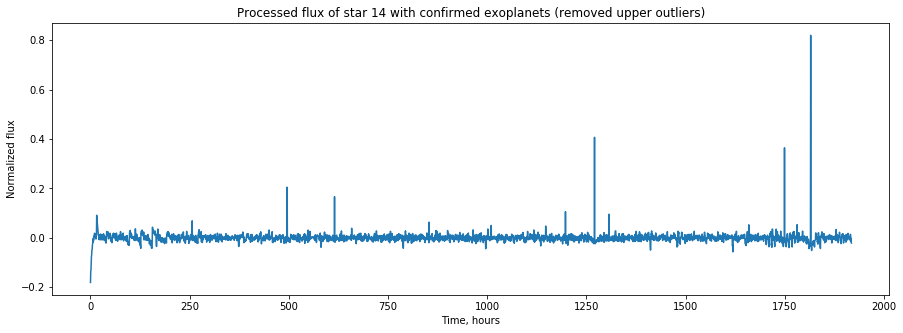

In [13]:
i = 13
flux1 = extrain[extrain.LABEL == 2].drop('LABEL', axis=1).iloc[i,:]
flux1 = flux1.reset_index(drop=True)
time = np.arange(len(flux1)) * (36.0/60.0) # time in units of hours
plt.figure(figsize=(15,5))
plt.title('Processed flux of star {} with confirmed exoplanets (removed upper outliers)'.format(i+1))
plt.ylabel('Normalized flux')
plt.xlabel('Time, hours')
plt.plot(time, flux1)

In [32]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

/home/adithya/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
extrain.LABEL.value_counts()

1    3927
2      33
Name: LABEL, dtype: int64

In [16]:
extest.LABEL.value_counts()

NameError: name 'extest' is not defined

In [34]:
from imblearn.over_sampling import SMOTE


In [35]:
def model_evaluator(X, y, model, n_splits=10):
    skf = StratifiedKFold(n_splits=n_splits)
    
    bootstrapped_accuracies = list()
    bootstrapped_precisions = list()
    bootstrapped_recalls    = list()
    bootstrapped_f1s        = list()
    
    SMOTE_accuracies = list()
    SMOTE_precisions = list()
    SMOTE_recalls    = list()
    SMOTE_f1s        = list()
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
                
        df_train    = X_train.join(y_train)
        df_planet   = df_train[df_train.LABEL == 2].reset_index(drop=True)
        df_noplanet = df_train[df_train.LABEL == 1].reset_index(drop=True)
        df_boot     = df_noplanet
                        
        index = np.arange(0, df_planet.shape[0])
        temp_index = np.random.choice(index, size=df_noplanet.shape[0])
        df_boot = df_boot.append(df_planet.iloc[temp_index])
        
        df_boot = df_boot.reset_index(drop=True)
        X_train_boot = df_boot.drop('LABEL', axis=1)
        y_train_boot = df_boot.LABEL
                    
        est_boot = model.fit(X_train_boot, y_train_boot)
        y_test_pred = est_boot.predict(X_test)
        
        bootstrapped_accuracies.append(accuracy_score(y_test, y_test_pred))
        bootstrapped_precisions.append(precision_score(y_test, y_test_pred, pos_label=2))
        bootstrapped_recalls.append(recall_score(y_test, y_test_pred, pos_label=2))
        bootstrapped_f1s.append(f1_score(y_test, y_test_pred, pos_label=2))
    
        sm = SMOTE(ratio = 1.0)
        X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
                    
        est_sm = model.fit(X_train_sm, y_train_sm)
        y_test_pred = est_sm.predict(X_test)
        
        SMOTE_accuracies.append(accuracy_score(y_test, y_test_pred))
        SMOTE_precisions.append(precision_score(y_test, y_test_pred, pos_label=2))
        SMOTE_recalls.append(recall_score(y_test, y_test_pred, pos_label=2))
        SMOTE_f1s.append(f1_score(y_test, y_test_pred, pos_label=2))
        
    print('\t\t\t Bootstrapped \t SMOTE')
    print("Average Accuracy:\t", "{:0.10f}".format(np.mean(bootstrapped_accuracies)),
          '\t', "{:0.10f}".format(np.mean(SMOTE_accuracies)))
    print("Average Precision:\t", "{:0.10f}".format(np.mean(bootstrapped_precisions)),
          '\t', "{:0.10f}".format(np.mean(SMOTE_precisions)))
    print("Average Recall:\t\t", "{:0.10f}".format(np.mean(bootstrapped_recalls)),
          '\t', "{:0.10f}".format(np.mean(SMOTE_recalls)))
    print("Average F1:\t\t", "{:0.10f}".format(np.mean(bootstrapped_f1s)),
          '\t', "{:0.10f}".format(np.mean(SMOTE_f1s)))

So, the baseline model evaluation is done below. First, let's see how we can model original raw unprocessed data:

In [37]:
extrain_raw = pd.read_csv('ExoTrain.csv')

In [38]:
X_raw = extrain_raw.drop('LABEL', axis=1)
y_raw = extrain_raw.LABEL

In [39]:
model_evaluator(X_raw, y_raw, LinearSVC())

/home/adithya/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/adithya/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/adithya/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


KeyboardInterrupt: 

```
			 Bootstrapped 	 SMOTE
Average Accuracy:	 0.6829269991 	 0.6841057810
Average Precision:	 0.0138773314 	 0.0139259401
Average Recall:		 0.6083333333 	 0.6083333333
Average F1:		 0.0271233559 	 0.0272157412
```

Now let's see how well we can fit a model using data that we have processed previously:

In [ ]:
X = extrain.drop('LABEL', axis=1)
y = extrain.LABEL

In [ ]:
model_evaluator(X, y, LinearSVC())

It looks like K-nearest neighbors classifier works well for both processed and minimally processed data. The fit improved from f1 score of 0.149 from the KNN trained on raw bootstrapped data to f1 score of 0.576 from the KNN trained on minimally processed data expanded with SMOTE. Let's see if we could improve our model further.  

## Improving the model  

If exoplanets exist around any given star, they should revolve around the star with frequencies far smaller than flux noise and other electromagnetic phenomena affecting flux. Therefore, let's consider analyzing flux frequency spectrum rather than raw flux data. In theory, the presence of exoplanets should contribute to lower frequencies in the spectrum making them good features to use for identification of stars with potential exoplanets.

In [40]:
import scipy

In [41]:
def spectrum_getter(X):
    Spectrum = scipy.fft(X, n=X.size)
    return np.abs(Spectrum)

In [42]:
X_train = extrain.drop('LABEL', axis=1)
y_train = extrain.LABEL

X_test = extest.drop('LABEL', axis=1)
y_test = extest.LABEL

NameError: name 'extest' is not defined

In [43]:
new_X_train = X_train.apply(spectrum_getter,axis=1)
new_X_test = X_test.apply(spectrum_getter,axis=1)

NameError: name 'X_test' is not defined

In [44]:
new_X_train.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1.484923e-15,0.012102,0.054644,0.046056,0.067882,0.226324,0.280088,0.058493,0.155593,0.215005,...,0.212969,0.215005,0.155593,0.058493,0.280088,0.226324,0.067882,0.046056,0.054644,0.012102
1,1.554312e-15,0.047070,0.123850,0.722844,0.101058,0.797285,0.536970,0.739510,0.273322,1.240037,...,0.375596,1.240037,0.273322,0.739510,0.536970,0.797285,0.101058,0.722844,0.123850,0.047070
2,2.775558e-15,0.087726,0.146326,0.616118,0.494032,2.933529,0.584828,0.628604,1.319654,0.411408,...,0.409018,0.411408,1.319654,0.628604,0.584828,2.933529,0.494032,0.616118,0.146326,0.087726
3,1.221245e-15,0.008226,0.083387,0.329613,0.544451,0.555409,1.055441,0.234241,0.688958,1.194138,...,0.339051,1.194138,0.688958,0.234241,1.055441,0.555409,0.544451,0.329613,0.083387,0.008226
4,1.110223e-15,0.020985,0.148268,0.462375,0.159567,0.567734,0.460200,0.353839,0.155672,0.113169,...,0.406625,0.113169,0.155672,0.353839,0.460200,0.567734,0.159567,0.462375,0.148268,0.020985


In [45]:
# Segregate data for desigining the model and for the final test
y = y_train
X = new_X_train

y_final_test = y_test
X_final_test = new_X_test

NameError: name 'y_test' is not defined

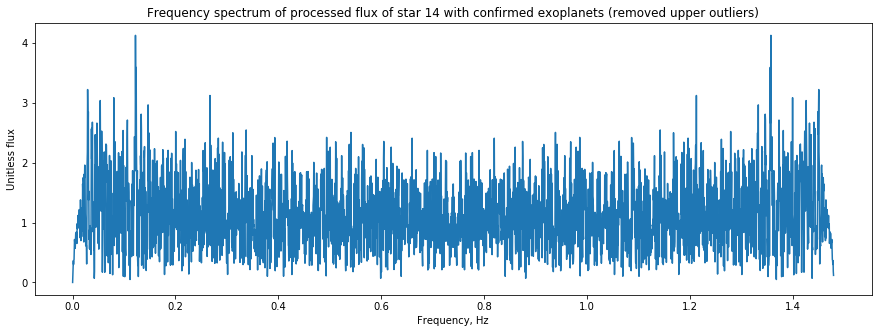

In [46]:
df = X.join(y)
i = 13
spec1 = df[df.LABEL == 2].drop('LABEL', axis=1).iloc[i,:]
freq = np.arange(len(spec1)) * (1/(36.0*60.0)) # Sampling frequency is 1 frame per ~36 minutes, or about 0.00046 Hz
plt.figure(figsize=(15,5))
plt.title('Frequency spectrum of processed flux of star {} with confirmed exoplanets (removed upper outliers)'
          .format(i+1))
plt.ylabel('Unitless flux')
plt.xlabel('Frequency, Hz')
plt.plot(freq, spec1)

Since [frequency spectra are symmetric](https://dsp.stackexchange.com/questions/4825/why-is-the-fft-mirrored), we need to remove half of all spectra:

In [47]:
X = X.iloc[:,:(X.shape[1]//2)]
X_final_test = X_final_test.iloc[:,:(X_final_test.shape[1]//2)]

NameError: name 'X_final_test' is not defined

Let's see what spectra look like for stars:

IndexError: single positional indexer is out-of-bounds

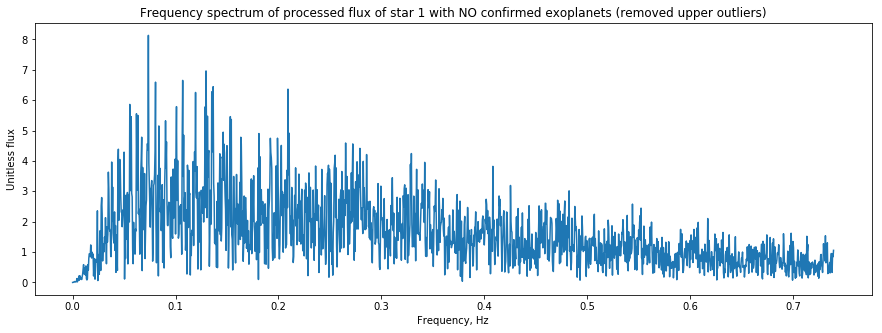

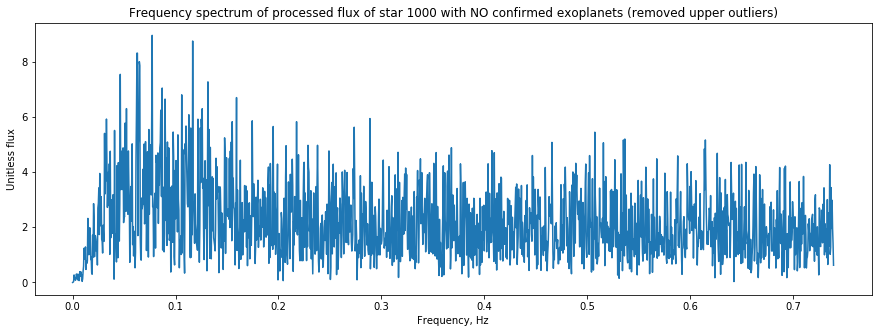

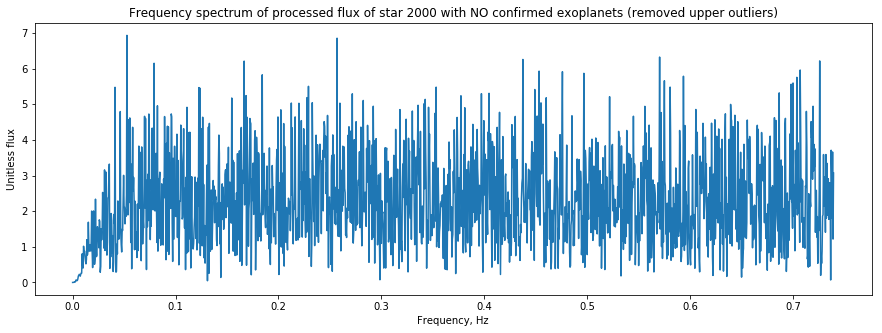

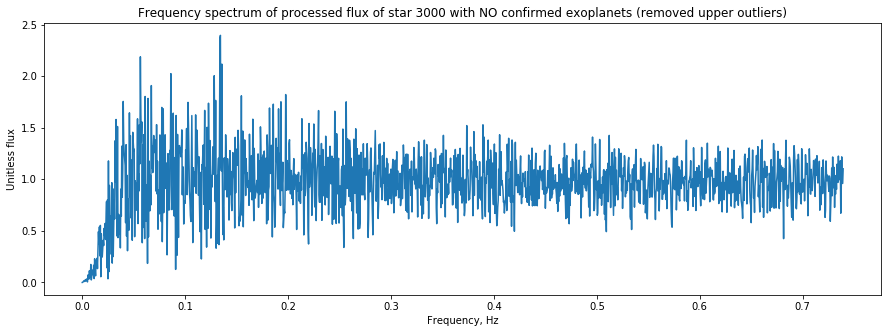

In [48]:
# Obtaining flux frequency spectra for several stars without exoplanets from the train data:
df = X.join(y)
for i in [0, 999, 1999, 2999, 3999, 4999]:
    spec1 = df[df.LABEL == 1].drop('LABEL', axis=1).iloc[i,:]
    freq = np.arange(len(spec1)) * (1/(36.0*60.0)) # Sampling frequency is 1 frame per ~36 minutes, or about 0.00046 Hz
    plt.figure(figsize=(15,5))
    plt.title('Frequency spectrum of processed flux of star {} with NO confirmed exoplanets (removed upper outliers)'
              .format(i+1))
    plt.ylabel('Unitless flux')
    plt.xlabel('Frequency, Hz')
    plt.plot(freq, spec1)

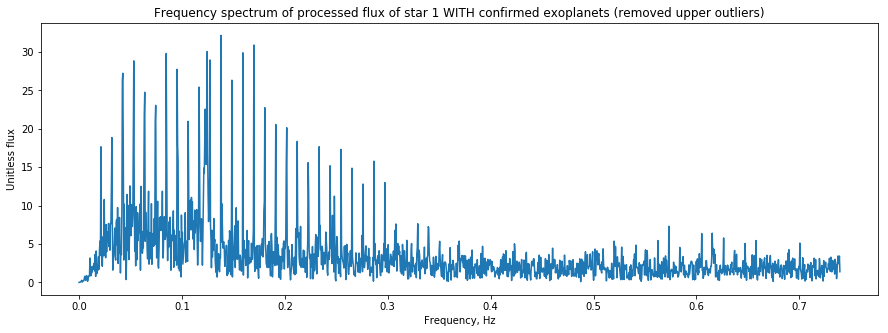

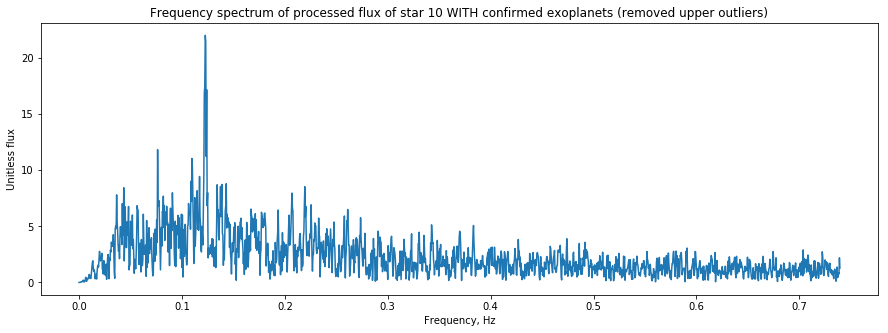

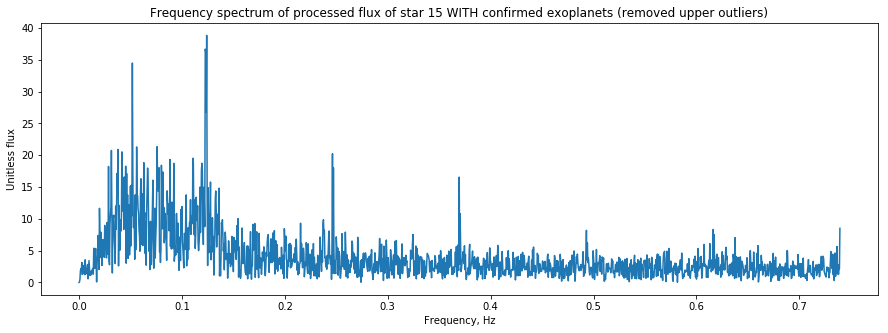

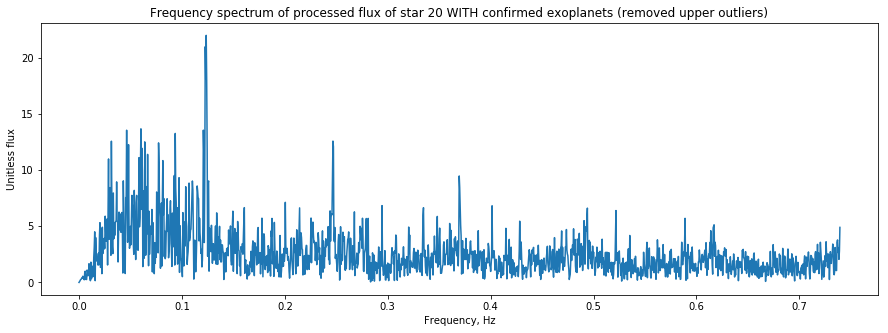

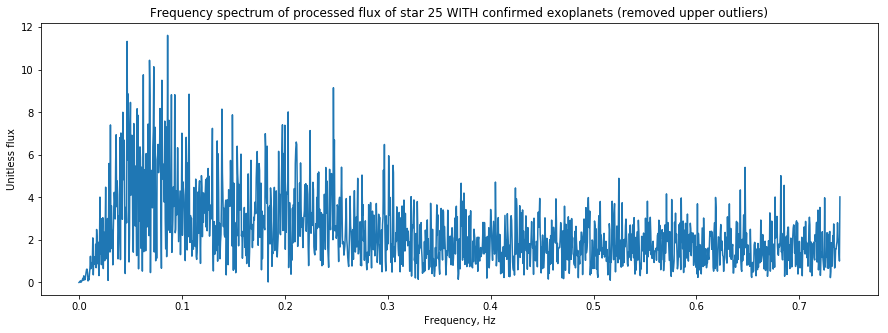

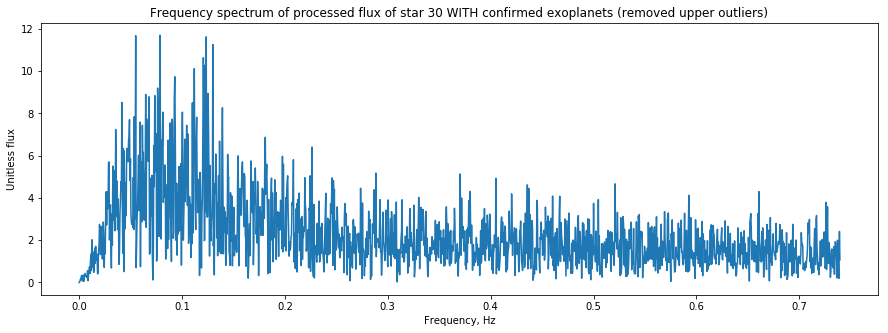

In [49]:
# Obtaining flux frequency spectra for several stars with exoplanets from the train data:
df = X.join(y)
for i in [0, 9, 14, 19, 24, 29]:
    spec1 = df[df.LABEL == 2].drop('LABEL', axis=1).iloc[i,:]
    freq = np.arange(len(spec1)) * (1/(36.0*60.0)) # Sampling frequency is 1 frame per ~36 minutes, or about 0.00046 Hz
    plt.figure(figsize=(15,5))
    plt.title('Frequency spectrum of processed flux of star {} WITH confirmed exoplanets (removed upper outliers)'
              .format(i+1))
    plt.ylabel('Unitless flux')
    plt.xlabel('Frequency, Hz')
    plt.plot(freq, spec1)

There is a noticeable bump on the left side of spectra for stars with exoplanets, so we may have a chance at improving our models, after all!  
But first, let's do a little housekeeping.

In [50]:
X.columns

Index(['FLUX.1', 'FLUX.2', 'FLUX.3', 'FLUX.4', 'FLUX.5', 'FLUX.6', 'FLUX.7',
       'FLUX.8', 'FLUX.9', 'FLUX.10',
       ...
       'FLUX.1589', 'FLUX.1590', 'FLUX.1591', 'FLUX.1592', 'FLUX.1593',
       'FLUX.1594', 'FLUX.1595', 'FLUX.1596', 'FLUX.1597', 'FLUX.1598'],
      dtype='object', length=1598)

Let's convert column names to frequencies they represent.

In [51]:
X_columns = np.arange(len(X.columns))
X_columns = X_columns * (1.0/(36.0*60.0)) # sampling frequency of our data
X.columns = X_columns
X_final_test.columns = X_columns

NameError: name 'X_final_test' is not defined

In [52]:
X.columns

Float64Index([                  0.0,  0.000462962962962963,
               0.000925925925925926,  0.001388888888888889,
               0.001851851851851852, 0.0023148148148148147,
               0.002777777777777778,  0.003240740740740741,
               0.003703703703703704,  0.004166666666666667,
              ...
                 0.7351851851851852,    0.7356481481481482,
                 0.7361111111111112,     0.736574074074074,
                  0.737037037037037,                0.7375,
                  0.737962962962963,    0.7384259259259259,
                 0.7388888888888889,    0.7393518518518519],
             dtype='float64', length=1598)

Now, let's do some modeling with our new and improved features!

## Modeling

In [ ]:
model_evaluator(X, y, LinearSVC())

/home/adithya/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
X = pd.DataFrame(normalize(X))
X_final_test = pd.DataFrame(normalize(X_final_test))

In [ ]:
# Obtaining flux frequency spectra for several stars with exoplanets from the train data:
df = X.join(y)
for i in [0, 9, 14, 19, 24, 29]:
    spec1 = df[df.LABEL == 2].drop('LABEL', axis=1).iloc[i,:]
    freq = np.arange(len(spec1)) * (1/(36.0*60.0)) # Sampling frequency is 1 frame per ~36 minutes, or about 0.00046 Hz
    plt.figure(figsize=(15,5))
    plt.title('Frequency spectrum of processed flux of star {} WITH confirmed exoplanets (removed upper outliers)'
              .format(i+1))
    plt.ylabel('Unitless flux')
    plt.xlabel('Frequency, Hz')
    plt.plot(freq, spec1)

In [ ]:
model_evaluator(X, y, LinearSVC())

Looks like we found our model to optimize! We can now look closely at Linear Support Vector Classification and find most optimal parameters for it via randomized and grid searches. Perhaps, we can improve the recall rate.  

Let's see if we can do better with SMOTE data balancing. This time `class_weight` is going to be `None` since the data will be balanced through synthetic data generation:

In [ ]:
def SMOTE_synthesizer(X, y):
        sm = SMOTE(ratio = 1.0)
        X, y = sm.fit_sample(X, y)
        return X, y

Unfortunately, none of the parameter searches yielded results better than our initial default LinearSVC() model. Therefore, we shall proceed and create our final model uising default parameters of LinearSVC():

## Final Model

In [ ]:
X_sm, y_sm = SMOTE_synthesizer(X, y)

In [ ]:
final_model = LinearSVC()
final_model.fit(X_sm, y_sm)

In [ ]:
y_pred = final_model.predict(X_final_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_final_test, y_pred))

This is a good precision and recall, especially in comparison with earlier baseline models. It will be interesting to see the adoption of such approach to star flux analysis in further K2 campaigns.